In [1]:
import pandas as pd

d = pd.read_csv('서울시 상권분석서비스(점포-자치구).csv', encoding='cp949')
d.head()

,기준_년분기_코드,자치구_코드,자치구_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,20191,11740,강동구,CS100004,양식음식점,139,158,10,15,5,8,19
1,20191,11740,강동구,CS300004,핸드폰,209,215,6,12,4,9,6
2,20191,11740,강동구,CS200034,여관,124,125,2,2,5,6,1
3,20191,11110,종로구,CS200005,스포츠 강습,88,92,2,2,5,5,4
4,20191,11110,종로구,CS300020,서적,263,263,1,2,2,6,0


In [2]:
df = pd.DataFrame(d[['기준_년분기_코드', '자치구_코드_명', '서비스_업종_코드_명', '점포_수', '프랜차이즈_점포_수']])
df['점포_계'] = df['점포_수'] + df['프랜차이즈_점포_수']
df.head()

,기준_년분기_코드,자치구_코드_명,서비스_업종_코드_명,점포_수,프랜차이즈_점포_수,점포_계
0,20191,강동구,양식음식점,139,19,158
1,20191,강동구,핸드폰,209,6,215
2,20191,강동구,여관,124,1,125
3,20191,종로구,스포츠 강습,88,4,92
4,20191,종로구,서적,263,0,263


In [3]:
df = df.set_index(['기준_년분기_코드', '자치구_코드_명'])
df # 년분기 레벨은 0, 자치구 레벨은 1

서비스_업종_코드_명  점포_수  프랜차이즈_점포_수  점포_계
기준_년분기_코드 자치구_코드_명                                    
20191     강동구            양식음식점   139          19   158
          강동구              핸드폰   209           6   215
          강동구               여관   124           1   125
          종로구           스포츠 강습    88           4    92
          종로구               서적   263           0   263
...                        ...   ...         ...   ...
20233     강동구             미곡판매   117           0   117
          강동구               가구   110           0   110
          강동구             가전제품   145           0   145
          강동구               악기    24           0    24
          강동구             인테리어   215           0   215

[47452 rows x 4 columns]

In [4]:
totals = df.groupby(['기준_년분기_코드', '자치구_코드_명'])['점포_계'].sum(numeric_only=True)
totals

기준_년분기_코드  자치구_코드_명
20191      강남구         54275
           강동구         20244
           강북구         13099
           강서구         25585
           관악구         19081
                       ...  
20233      용산구         19569
           은평구         19874
           종로구         25916
           중구          38075
           중랑구         17445
Name: 점포_계, Length: 475, dtype: int64

In [5]:
df['구별_계'] = totals
df['업종_비'] = df['점포_계'] / df['구별_계']
df

서비스_업종_코드_명  점포_수  프랜차이즈_점포_수  점포_계   구별_계      업종_비
기준_년분기_코드 자치구_코드_명                                                     
20191     강동구            양식음식점   139          19   158  20244  0.007805
          강동구              핸드폰   209           6   215  20244  0.010620
          강동구               여관   124           1   125  20244  0.006175
          종로구           스포츠 강습    88           4    92  25280  0.003639
          종로구               서적   263           0   263  25280  0.010403
...                        ...   ...         ...   ...    ...       ...
20233     강동구             미곡판매   117           0   117  22619  0.005173
          강동구               가구   110           0   110  22619  0.004863
          강동구             가전제품   145           0   145  22619  0.006411
          강동구               악기    24           0    24  22619  0.001061
          강동구             인테리어   215           0   215  22619  0.009505

[47452 rows x 6 columns]

In [6]:
df.index
df.xs('강동구', level='자치구_코드_명').head()
df.xs(20233, level='기준_년분기_코드').describe()

# 업종비 순으로 정렬
df = df.sort_values(by=['기준_년분기_코드', '자치구_코드_명', '업종_비'], ascending=False)
df.head()

서비스_업종_코드_명  점포_수  프랜차이즈_점포_수  점포_계   구별_계      업종_비
기준_년분기_코드 자치구_코드_명                                                     
20233     중랑구            한식음식점  1971         149  2120  17445  0.121525
          중랑구           전자상거래업  1909           1  1910  17445  0.109487
          중랑구             일반의류   843           0   843  17445  0.048323
          중랑구           부동산중개업   793           0   793  17445  0.045457
          중랑구              미용실   759          28   787  17445  0.045113

In [7]:
ddf = df.loc[20233] # 23년 3분기 지역, 업종, 비율 데이터만
ddf.reset_index(drop=False, inplace=True)
ddf

,자치구_코드_명,서비스_업종_코드_명,점포_수,프랜차이즈_점포_수,점포_계,구별_계,업종_비
0,중랑구,한식음식점,1971,149,2120,17445,0.121525
1,중랑구,전자상거래업,1909,1,1910,17445,0.109487
2,중랑구,일반의류,843,0,843,17445,0.048323
3,중랑구,부동산중개업,793,0,793,17445,0.045457
4,중랑구,미용실,759,28,787,17445,0.045113
...,...,...,...,...,...,...,...
2493,강남구,비디오/서적임대,16,3,19,60570,0.000314
2494,강남구,고시원,15,0,15,60570,0.000248
2495,강남구,전자게임장,12,0,12,60570,0.000198
2496,강남구,볼링장,10,0,10,60570,0.000165


In [8]:
ddf = ddf.loc[:, ['자치구_코드_명', '서비스_업종_코드_명', '업종_비']]

# 피벗화
dfp = ddf.pivot(index='자치구_코드_명', columns='서비스_업종_코드_명', values='업종_비')

# dfp.loc['강남구']

dfp.index.name='district'
dfp.columns.name='type'
dfp.head()

type,DVD방,PC방,가구,가방,가전제품,가전제품수리,가정용품임대,건축물청소,게스트하우스,고시원,...,편의점,피부관리실,한복점,한식음식점,한의원,핸드폰,호프-간이주점,화장품,화초,회계사사무소
district,,,,,,,,,,,,,,,,,,,,,
강남구,0.000594,0.000974,0.007694,0.005151,0.004920,0.001882,0.000958,0.003649,0.000512,0.000248,...,0.016163,0.017880,0.000859,0.083606,0.006686,0.003599,0.010005,0.047532,0.011805,0.004573
강동구,0.000575,0.002211,0.004863,0.004509,0.006411,0.005880,0.001592,0.007383,0.000265,0.000575,...,0.018878,0.013838,0.000707,0.098192,0.008665,0.008135,0.016623,0.025863,0.010655,0.000531
강북구,0.001262,0.002314,0.003367,0.003437,0.005751,0.006873,0.001683,0.008346,0.000281,0.000631,...,0.021251,0.015991,0.000842,0.134311,0.006523,0.008907,0.020059,0.021742,0.006312,0.000771
강서구,0.000727,0.001686,0.004892,0.003536,0.005520,0.004859,0.001157,0.007238,0.000331,0.000297,...,0.020756,0.019864,0.000430,0.101434,0.006676,0.007106,0.015567,0.030374,0.007007,0.000992
관악구,0.001384,0.002815,0.003912,0.002624,0.005725,0.006107,0.000906,0.007204,0.000763,0.002576,...,0.023758,0.017366,0.000572,0.118172,0.007061,0.009255,0.020801,0.021707,0.006107,0.000716


In [9]:
dfp.isnull().sum(1) # 결측치 확인

district
강남구     0
강동구     0
강북구     1
강서구     0
관악구     0
광진구     0
구로구     0
금천구     0
노원구     0
도봉구     0
동대문구    0
동작구     0
마포구     0
서대문구    0
서초구     0
성동구     0
성북구     0
송파구     0
양천구     0
영등포구    0
용산구     0
은평구     0
종로구     0
중구      0
중랑구     1
dtype: int64

In [10]:
dfp.fillna(0, inplace=True) # 결측치 -> 0으로 처리

In [11]:
from collections import Counter

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0, n_init=10)
clusters = kmeans.fit(dfp)

Counter(clusters.labels_)


Counter({0: 4, 2: 15, 4: 4, 3: 1, 1: 1})

In [12]:
dfp1 = dfp.copy()
dfp1['분류'] = clusters.labels_
dfp1.head()

type,DVD방,PC방,가구,가방,가전제품,가전제품수리,가정용품임대,건축물청소,게스트하우스,고시원,...,피부관리실,한복점,한식음식점,한의원,핸드폰,호프-간이주점,화장품,화초,회계사사무소,분류
district,,,,,,,,,,,,,,,,,,,,,
강남구,0.000594,0.000974,0.007694,0.005151,0.004920,0.001882,0.000958,0.003649,0.000512,0.000248,...,0.017880,0.000859,0.083606,0.006686,0.003599,0.010005,0.047532,0.011805,0.004573,0
강동구,0.000575,0.002211,0.004863,0.004509,0.006411,0.005880,0.001592,0.007383,0.000265,0.000575,...,0.013838,0.000707,0.098192,0.008665,0.008135,0.016623,0.025863,0.010655,0.000531,2
강북구,0.001262,0.002314,0.003367,0.003437,0.005751,0.006873,0.001683,0.008346,0.000281,0.000631,...,0.015991,0.000842,0.134311,0.006523,0.008907,0.020059,0.021742,0.006312,0.000771,2
강서구,0.000727,0.001686,0.004892,0.003536,0.005520,0.004859,0.001157,0.007238,0.000331,0.000297,...,0.019864,0.000430,0.101434,0.006676,0.007106,0.015567,0.030374,0.007007,0.000992,2
관악구,0.001384,0.002815,0.003912,0.002624,0.005725,0.006107,0.000906,0.007204,0.000763,0.002576,...,0.017366,0.000572,0.118172,0.007061,0.009255,0.020801,0.021707,0.006107,0.000716,2


In [13]:
dfp1.groupby('분류')['PC방'].count()

분류
0     4
1     1
2    15
3     1
4     4
Name: PC방, dtype: int64

In [14]:
dfp1.loc[:, ['분류']].sort_values(by='분류', axis=0, ascending=True)

type,분류
district,
강남구,0
양천구,0
송파구,0
서초구,0
중구,1
은평구,2
영등포구,2
성북구,2
서대문구,2


In [15]:
dist_num = dfp1.loc[:, '분류']
# dist_ar['강남구']

In [16]:
import requests
import json
import folium as g

# Map 함수에서 location으로 처음 화면 나오는 부분을 설정. 위도, 경도가 들어감
# zoom_start는 지도 확대 정도 초깃값

# g_map = g.Map(location=[37.2982901, 126.9931978], zoom_start=18)

# 서울 행정구역 json raw파일(githubcontent)
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')

c = r.content
seoul_geo = json.loads(c)

m = g.Map(
    location=[37.559819, 126.963895],
    zoom_start=11,
    # tiles='cartodbpositron'
)
g.GeoJson(
    seoul_geo,
    name='지역구',
    style_function = lambda x: {
        'fillColor' : 'gray'
    },
).add_to(m)

m

In [17]:
dist = pd.read_csv('korea_administrative_division_latitude_longitude.csv')
dist.head()

,docity,do,city,longitude,latitude
0,강원강릉시,강원,강릉시,128.878497,37.749136
1,강원고성군,강원,고성군,128.470164,38.377961
2,강원동해시,강원,동해시,129.116633,37.521931
3,강원삼척시,강원,삼척시,129.167489,37.447086
4,강원속초시,강원,속초시,128.594167,38.204275


In [18]:
dist_ = dist.loc[dist['do']=='서울', ['city', 'latitude', 'longitude']]
dist_.head()

,city,latitude,longitude
138,강남구,37.514575,127.049556
139,강동구,37.527367,127.125864
140,강북구,37.636956,127.027719
141,강서구,37.548156,126.851675
142,관악구,37.475386,126.953844


In [19]:
# 앞서 한 클러스터 분류랑 조인해서 표시(0-4)

dist_labels = dfp1.loc[:, ['분류']]
dist_ = pd.merge(dist_, dist_labels, left_on='city', right_on='district', how='inner')
dist_.head()

,city,latitude,longitude,분류
0,강남구,37.514575,127.049556,0
1,강동구,37.527367,127.125864,2
2,강북구,37.636956,127.027719,2
3,강서구,37.548156,126.851675,2
4,관악구,37.475386,126.953844,2


In [20]:
# for i in range(0, len(dist_)):
#     print(dist_.loc[i]['분류'])

In [21]:
# 지도에 분류대로 다르게 표시

colors = ['blue', 'red', 'orange', 'gray', 'green']

for i in range(0, len(dist_)):
    g.Marker(location=[dist_.loc[i]['latitude'], dist_.loc[i]['longitude']],
             popup=dist_.loc[i]['city'],
             icon=g.Icon(color= colors[dist_.loc[i]['분류']])).add_to(m)

m



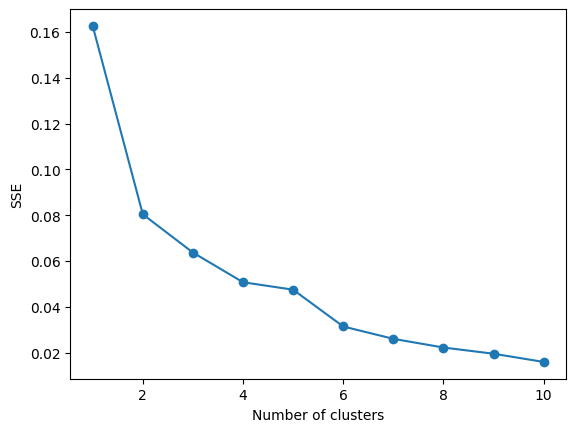

In [22]:
import matplotlib.pyplot as plt

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(dfp)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [23]:
# for geos in dist_:
#     g.Marker([geos[1], geos[2]], popup=geos[0]).add_to(m)

# m

In [24]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.cluster.hierarchy import dendrogram, linkage

# c2 = linkage(y=dfp, method='complete', metric='euclidean')
# c2.shape # -> (24, 4)

# plt.figure( figsize = (10, 5) )
# dendrogram(c2, leaf_rotation=90, leaf_font_size=12)
# plt.show()


In [25]:
# ddf.loc[ddf['자치구_코드_명']=='동대문구']
# district = ddf['자치구_코드_명'].unique()

In [26]:
# dtops = df.groupby(['기준_년분기_코드', '자치구_코드_명']).apply(lambda x: x.nlargest(20, '업종_비', keep='all'))
# dtops.to_csv('top5s.csv', encoding='cp949')
